### **Import Liberaries**


In [ ]:
import cv2
import os
import glob
import imghdr
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### **Import** **data** **form drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read the dataset**

In [ ]:
image_dataset='/content/drive/MyDrive/Ms-dataset'
no_ms=os.listdir('/content/drive/MyDrive/Ms-dataset/Control-Axial')
yes_ms=os.listdir('/content/drive/MyDrive/Ms-dataset/MS-Axial')
print(len(no_ms))
#print(no_ms)

1002


### **Resize image**

In [ ]:
#test
inputFolder = 'no_ms'
file= glob.glob('/content/drive/MyDrive/Ms-dataset/Control-Axial/*.png')
print(file)

['/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (1001).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (1000).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (103).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (1).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (10).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (106).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (108).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (109).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (105).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (107).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (102).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (1002).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (104).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (110).png', '/content/drive/MyDrive/Ms-dataset/Control-Axial/C-A (11).png', '/content/drive/MyDrive/M

In [ ]:
i=0
# inputFolder = 'no_ms'
for img in glob.glob('/content/drive/MyDrive/Ms-dataset/Control-Axial/*.png'):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (256, 256))
    status=cv2.imwrite("/content/drive/MyDrive/Ms-dataset/Data/no_ms_Resized_Folder/image%i.png" %i, imgResized)
    i +=1

KeyboardInterrupt: 

In [ ]:
i=0
# inputFolder = 'yes_ms'
for img in glob.glob('/content/drive/MyDrive/Ms-dataset/MS-Axial/*.png'):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (256, 256))
    statuss=cv2.imwrite("/content/drive/MyDrive/Ms-dataset/Data/yes_ms_Resized_Folder/image%i.png" %i, imgResized)
    i +=1

KeyboardInterrupt: 

In [ ]:
#status for no-ms
print(status)
#status for yes-ms
print(statuss)

True
True


In [ ]:
no_ms_Resized_Folder=os.listdir('/content/drive/MyDrive/Ms-dataset/Data/no_ms_Resized_Folder')
print(len(no_ms_Resized_Folder))

1002


In [ ]:
yes_ms_Resized_Folder=os.listdir('/content/drive/MyDrive/Ms-dataset/Data/yes_ms_Resized_Folder')
print(len(yes_ms_Resized_Folder))

650


###**Remove dodgy images**


In [ ]:
data_dir ='/content/drive/MyDrive/Ms-dataset/Data'
print(data_dir)

/content/drive/MyDrive/Ms-dataset/Data


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip !='png':
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [ ]:
#to show the defult pararmeters
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
#Size of the batches of data, Default: 32
data = tf.keras.utils.image_dataset_from_directory(data_dir,color_mode = 'grayscale')

Found 1652 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

###**Load Data**

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 1)

In [ ]:
len(batch)

2

In [ ]:
#1-> yes
#0-> no
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

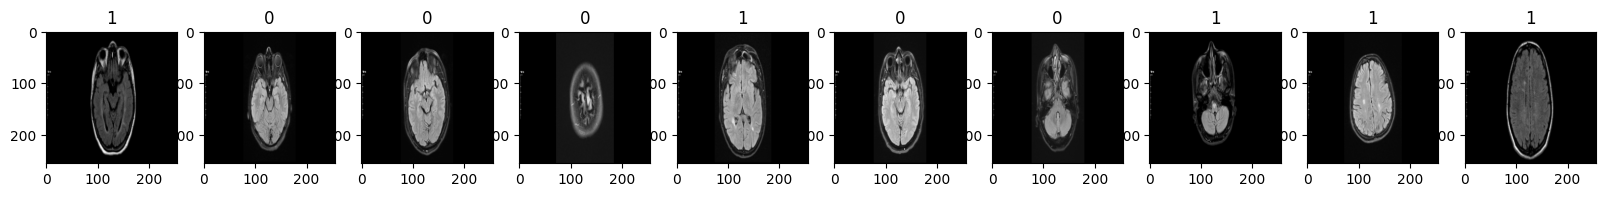

In [ ]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int),cmap='gray')
    ax[idx].title.set_text(batch[1][idx])

###**Scaling data**

In [ ]:
scaled=batch[0]/255

In [ ]:
scaled.max()

0.9937038

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

0.9578393

In [ ]:
#number of batches=1652/32=52
len(data)

52

###**Spilting data**

In [ ]:
x=batch[0]
y=batch[1]

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

52

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(data)

52

### **Build Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

###**Train**

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#hist = model.fit(X_train,y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
36/36 [==============================] - 78s 2s/step - loss: 0.5642 - accuracy: 0.7057 - val_loss: 0.5280 - val_accuracy: 0.7219
Epoch 2/5
36/36 [==============================] - 83s 2s/step - loss: 0.3974 - accuracy: 0.8220 - val_loss: 0.3628 - val_accuracy: 0.8594
Epoch 3/5
36/36 [==============================] - 84s 2s/step - loss: 0.3322 - accuracy: 0.8490 - val_loss: 0.3443 - val_accuracy: 0.8375
Epoch 4/5
36/36 [==============================] - 85s 2s/step - loss: 0.2686 - accuracy: 0.8950 - val_loss: 0.2521 - val_accuracy: 0.8969
Epoch 5/5
36/36 [==============================] - 82s 2s/step - loss: 0.2620 - accuracy: 0.8993 - val_loss: 0.2417 - val_accuracy: 0.9000


###**Plot Performance**

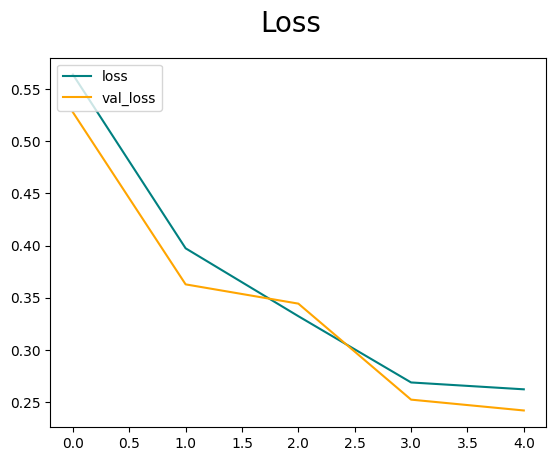

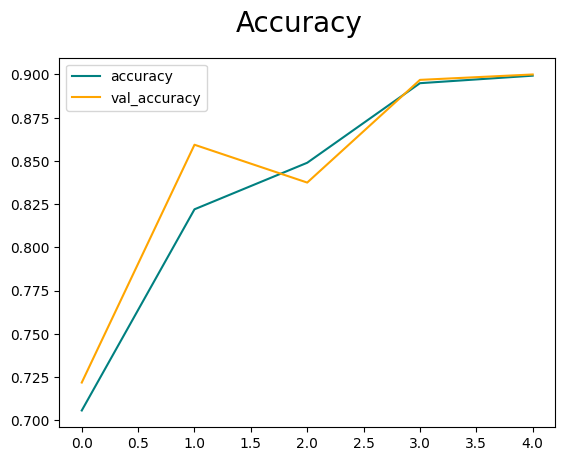

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

###**Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    #X, y = batch
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 365ms/step
tf.Tensor(0.91780823, shape=(), dtype=float32) tf.Tensor(0.943662, shape=(), dtype=float32) tf.Tensor(0.9444444, shape=(), dtype=float32)


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.91780823, shape=(), dtype=float32) tf.Tensor(0.943662, shape=(), dtype=float32) tf.Tensor(0.9444444, shape=(), dtype=float32)


###**Test**

In [ ]:
path='/content/drive/MyDrive/Ms-dataset/Test/test/img_test.jpg'
path

'/content/drive/MyDrive/Ms-dataset/Test/test/img_test.jpg'

In [ ]:
test_image=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Ms-dataset/Test')

Found 1 files belonging to 1 classes.


In [ ]:
test_image

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_image??

In [ ]:
yhat = model.predict(test_image)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
      • training=False
      • mask=None


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("model.pkl", "wb"))